# Final Project: Heart Disease Prediction
Author: Chenyue Qian, Nizel Abalos, Richard Luo, Darwin Zhang


## 1 Introduction & Research Question

Heart disease is one of the major causes of death, and many heart disease conditions are often unrecognized by healthcare professionals around the world (Hassan et al., 2022). Thus, it would be helpful if the statistical model could be utilized to predict the presence of heart disease based on the patient's demographic information and clinical test results. This could increase the doctors' ability to detect heart disease, which allows the patient to get treatment during the early stages of heart diseases. 

Hence, this project will focus on the following questions: 
> **Based on the given characteristics (such as age, sex, chest pain type, etc) of a patient undergoing angiography, can we predict whether the patient has heart disease accurately?**

This question will mainly focus on prediction since we want to see whether statistical models can produce accurate predictions of the presence of heart disease.


## 2. Data
Our data is related to heart disease in patients undergoing angiography at Cleveland Clinic in Cleveland, Ohio, US. The researchers conducted clinical and noninvasive tests on 303 patients undergoing angiography (Detrano et al., 1989). They first collected a total of 76 attributes from each patient and chose 14 attributes that they thought were most important. Then, they built this dataset. Among these 14 attributes, 13 of them are explanatory variables, which are demographic information about the results of these clinical and noninvasive tests on patients. The remaining one is the response variable, which refers to the presence of heart disease in the patient. (Reference link: Heart Disease https://archive.ics.uci.edu/dataset/45/heart+disease)

Now, we will provide a full description of each variable in the data:







| Variable | Type | Description |
| --- | --- | --- |
| age | Numerical | Age of the Patients |
| sex | Categorical | The Sex of the Patients (1 = male; 0 = female) |
| cp | Categorical | Chest pain type (1: typical angina; 2: atypical angina; Value 3: non-anginal pain; Value 4: asymptomatic) |
| trestbps | Numerical | Resting Blood Pressure of Patients|
| chol | Numerical | Serum Cholesterol measured in mg/dl |
| fbs | Categorical | Whether Fasting Blood Sugar greater than 120 mg/dl (1 = true; 0 = false) |
| restecg | Categorical | Resting Electrocardiographic Results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV);  2: showing probable or definite left ventricular hypertrophy by Estes' criteria)|
| thalach | Numerical | Maximum Heart Rate Achieve for the Patients|
| exang | Categorical | Whether Patients have Exercise Induced Angina (1 = yes; 0 = no)|
| oldpeak | Numerical | ST depression induced by exercise relative to rest |
| slope | Categorical | The slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)|
| ca | Numerical | number of major vessels (0-3) colored by fluoroscopy |
| thal | Categorical | The condition of thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect) |
| target | Categorical | Diagnosis of Heart Disease (Two categories: presence = 1,2,3,4; absence = 0)|

<font color='grey'>Table 1. Descrption of Variables in the Data Set </font> 

To summarize, there are a total of 303 observations in our data; each corresponds to a patient undergoing angiography at the Cleveland Clinic. There are some missing values in the data, and we will do data cleaning in the following section.

## 3 Exploratory  Data Analysis


### 3.1 Data Cleaning

To start with, we first clean our data to make it into a tidy format. 
1. The original dataset for Cleveland Clinic does not have the column name for each variable. Hence, it is necessary to match the variable name from the description to the data.
2. The data has the response variable saved as presence = 1,2,3,4, and absence = 0. Since we are only interested in whether heart disease is present, I would change the value to either "Present" and "Absent".
3. Some columns in our data are categorical. But those are not considered categorical in the raw dataset, so we need to change them to factors.
4. There are some missing values in our data, I need to remove those before the analysis.

In [33]:
# load library
library(tidyverse)
library(ggplot2)
library(cowplot)
library(caret)
library(tidymodels)
library(glmnet)
library(pROC)
library(car)
library(leaps)
library(MASS)

In [34]:
# read in raw Cleveland dataset
raw_cle <- read.csv("https://raw.githubusercontent.com/ScottCY/STAT301/main/processed.cleveland.data.csv", header = F)
head(raw_cle)

V1 V2 V3 V4  V5  V6 V7 V8  V9 V10 V11 V12 V13 V14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

In [35]:
# read the full data set to get the column names
raw_ful <- read.csv("https://raw.githubusercontent.com/ScottCY/STAT301/main/heart_full.csv")
column_names <- colnames(raw_ful)

By looking at the description from the original data website, we gather evidence that the full data set has columns ordered in the same way as the Cleaveland dataset. Hence, I copied the name from full data set to the data set used in this project.

In [36]:
# map the column from full dataset to the one we want to use
colnames(raw_cle) <- column_names
head(raw_cle)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0 
2 67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
3 67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
4 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0 
5 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0 
6 56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0 
  target
1 0     
2 2     
3 1     
4 0     
5 0     
6 0

In [37]:
# rename the response variable
final_data <- raw_cle %>%
    mutate(target = ifelse(target==0, "Absent", "Present"))

In [38]:
# change the column's class
final_data$sex <- as.factor(final_data$sex)
final_data$cp <- as.factor(final_data$cp)
final_data$fbs <- as.factor(final_data$fbs)
final_data$restecg <- as.factor(final_data$restecg)
final_data$exang <- as.factor(final_data$exang)
final_data$slope <- as.factor(final_data$slope)
final_data$ca <- as.double(final_data$ca)
final_data$thal <- as.factor(as.double(final_data$thal))
final_data$target <- as.factor(final_data$target)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in is.factor(x):
“NAs introduced by coercion”


In [39]:
# check the missing values for each column
na_count <- sapply(final_data, function(y) sum(length(which(is.na(y)))))
na_count

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        4        2        0

Since we can see that there are four missing value for category "ca", we need to remove those observations before moving forward.


In [40]:
final_data <- na.omit(final_data) # omit NA values
head(final_data)
nrow(final_data)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1 63  1   1  145      233  1   2       150     0     2.3     3     0  6   
2 67  1   4  160      286  0   2       108     1     1.5     2     3  3   
3 67  1   4  120      229  0   2       129     1     2.6     2     2  7   
4 37  1   3  130      250  0   0       187     0     3.5     3     0  3   
5 41  0   2  130      204  0   2       172     0     1.4     1     0  3   
6 56  1   2  120      236  0   0       178     0     0.8     1     0  3   
  target 
1 Absent 
2 Present
3 Present
4 Absent 
5 Absent 
6 Absent

[1] 297

At this stage, we get our final data (have 297 observations), and can then proceed to data summary and visualization.

### 3.2 Data Summary and Visualization

In this part, firstly, we provide simple summaries of some of the variables. This could provide us with more understanding about the data itself. Then, since the main goal of this project is to build a model to predict whether a patient has heart disease, it is also meaningful to get some insights into the association between our response variable and explanatory variables during explanatory data analysis. Hence, in the later subsections, we investigate the association between chosen explanatory variable and the response variable, as well as the interaction between those chosen explanatory variables. 


### 3.2.1 Basic Summary about Data

In [41]:
# Summary of the numerical explanatory variables
num_data <- final_data %>%
            dplyr::select(age,trestbps,chol,thalach,oldpeak,ca) 

table_1 <- do.call(cbind, lapply(num_data, summary)) # summary of each variable

colnames(table_1) <- c("Age", "Blood Pressure",
                        "Serum Cholesterol", "Maximum Heart Rate",
                        "ST depression", "Number of Major Vessels")
table_1

Age      Blood Pressure Serum Cholesterol Maximum Heart Rate
Min.    29.00000  94.0000       126.0000           71.0000          
1st Qu. 48.00000 120.0000       211.0000          133.0000          
Median  56.00000 130.0000       243.0000          153.0000          
Mean    54.54209 131.6936       247.3502          149.5993          
3rd Qu. 61.00000 140.0000       276.0000          166.0000          
Max.    77.00000 200.0000       564.0000          202.0000          
        ST depression Number of Major Vessels
Min.    0.000000      0.0000000              
1st Qu. 0.000000      0.0000000              
Median  0.800000      0.0000000              
Mean    1.055556      0.6767677              
3rd Qu. 1.600000      1.0000000              
Max.    6.200000      3.0000000

<font color='grey'>Table 2. Summary of Numerical Explantory Variables </font> 

From Table 2, we can see that for all the patients, the mean age is 54.5, the mean blood pressure is 131.69, the mean Serum Cholesterol level is 247.35 mg/dl, the mean Maximum Heart Rate is 149.59, and the mean Number of Major Vessels colored by fluoroscopy is 0.677.

Now, for the **categorical variables**, we have not provided plots for all the variables since it would be very lengthy and not very meaningful. Instead, after investigating all of them separately, we choose those that could provide important insights and presented them here.

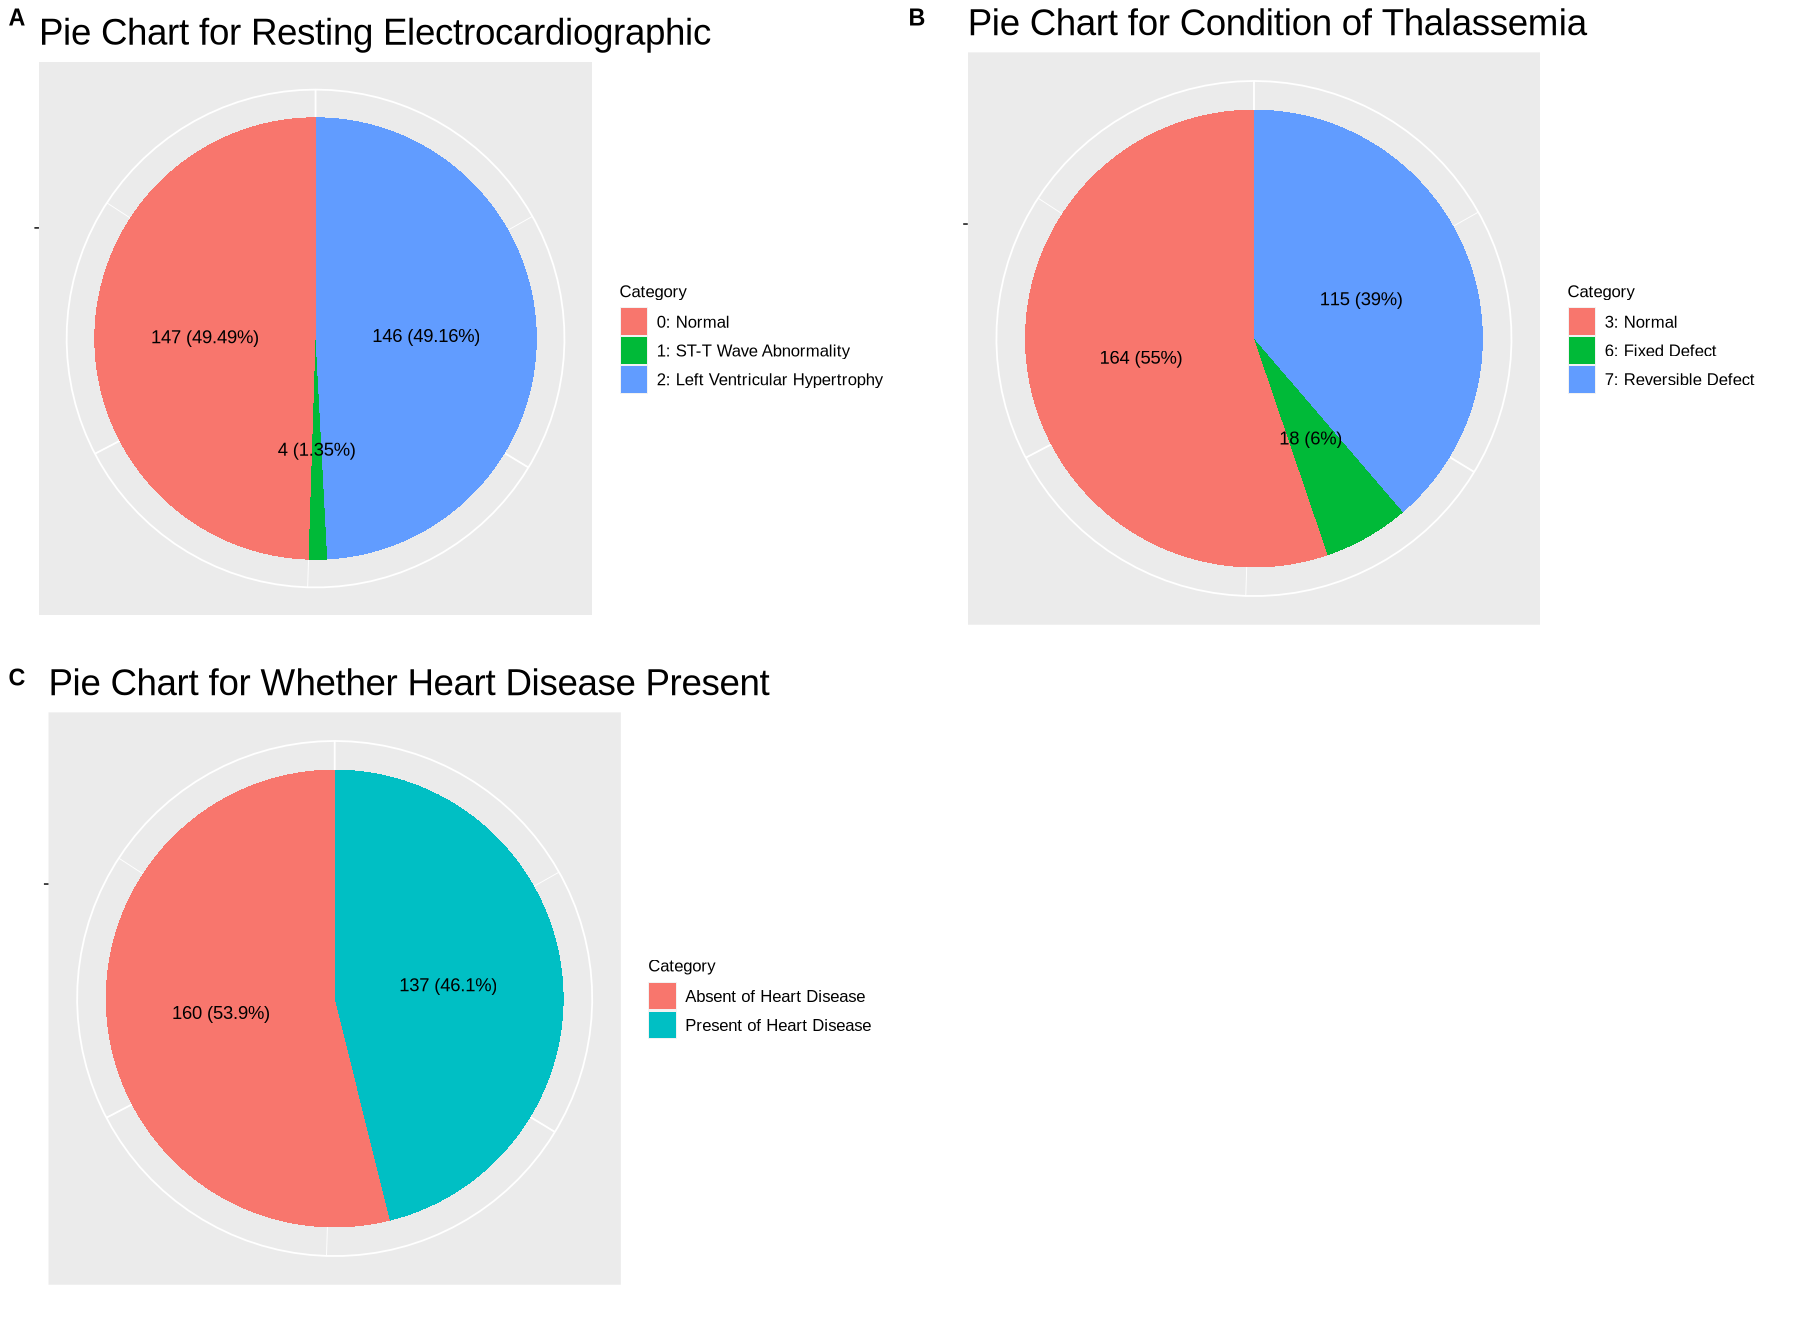

In [42]:
# here, present side by side barchart to summarize the number of observation for categorical variables. 

options(repr.plot.width=15, repr.plot.height=11) # set plot window

col_data <- final_data %>%
            dplyr::select(- c(age,trestbps,chol,thalach,oldpeak,ca))

summ_col <- lapply(col_data, summary) # summary of each variable
restecg_data <- data.frame(Category = 
                           as.factor(c("0: Normal", "1: ST-T Wave Abnormality", 
                                       "2: Left Ventricular Hypertrophy")), 
                           value = summ_col$restecg) # create data frame for restecg
thal_data <- data.frame(Category = 
                        as.factor(c("3: Normal",
                                     "6: Fixed Defect", 
                                     "7: Reversible Defect")), 
                        value = summ_col$thal)# create data frame for thal
target_data <- data.frame(Category = c("Absent of Heart Disease", "Present of Heart Disease"), 
                          value = summ_col$target)# create data frame for target (response)
# create each pie chart 
piechart1 <- ggplot(restecg_data, aes(x="", y=value, fill=Category)) +
  geom_bar(width=1, stat="identity") +
  coord_polar("y", start=0) +
  xlab("") +
  ylab("") +
  theme(axis.text.x=element_blank(),axis.ticks.x=element_blank()) + 
  ggtitle("Pie Chart for Resting Electrocardiographic") + 
  geom_text(aes(label = paste0(value,
                               " (",
                               scales::percent(value / sum(value)),
                               ")")),
            position = position_stack(vjust = 0.5)) + # add annotation on the plot
  theme(plot.title = element_text(size=22), # change the text size
       legend.text = element_text(size=10),
       legend.title = element_text(size = 10))
piechart2 <- ggplot(thal_data, aes(x="", y=value, fill=Category)) +
  geom_bar(width=1, stat="identity") +
  coord_polar("y", start=0) +
  xlab("") +
  ylab("") +
  theme(axis.text.x=element_blank(),axis.ticks.x=element_blank()) + 
  ggtitle("Pie Chart for Condition of Thalassemia") + 
  geom_text(aes(label = paste0(value,
                               " (",
                               scales::percent(value / sum(value)),
                               ")")),
            position = position_stack(vjust = 0.5)) +
  theme(plot.title = element_text(size=22), # change the text size
       legend.text = element_text(size=10),
       legend.title = element_text(size = 10))
piechart3 <- ggplot(target_data, aes(x="", y=value, fill=Category)) +
  geom_bar(width=1, stat="identity") +
  coord_polar("y", start=0) +
  xlab("") +
  ylab("") +
  theme(axis.text.x=element_blank(),axis.ticks.x=element_blank()) + 
  ggtitle("Pie Chart for Whether Heart Disease Present") + 
  geom_text(aes(label = paste0(value,
                               " (",
                               scales::percent(value / sum(value)),
                               ")")),
            position = position_stack(vjust = 0.5)) +
  theme(plot.title = element_text(size=22), # change the text size
       legend.text = element_text(size=10),
       legend.title = element_text(size = 10))
# Plot these three pie chart together
plot_grid(piechart1, piechart2, piechart3,nrow = 2, labels = "AUTO") 

<font color='grey'>Figure 1. Pie Chart about Number of Observations for Three Variables in Dataset</font> 

The first two pie plots in Figure 1 provide some insights into the number of observations in each category of the two categorical explanatory variables: "Resting Electrocardiographic" and "Condition of Thalassemia." It shows that the number of observations in each category is very unbalanced. For example, we can see that for "Resting Electrocardiographic," the category of  ST-T Wave Abnormality has only 4 observations. Also, for "Condition of Thalassemia," the category of Fixed Effect has only 18 observations (6% of all observations). In this case, we should pay attention to these unbalanced observations later when building the model since the low observation number for some categories might make our result less robust.

The last pie plot shows that, in our dataset, 160 patients do not have heart disease, while 137 patients have heart disease. Hence, our response variable has fairly balanced observations in each category, which is good for our analysis.  



### 3.2.2 Association between Categorical Explanatory Variables and Response Variable

In this subsection, we investigate the relationship between categorical explanatory variables and the response variable through Barplots. We have looked at all of the categorical variables. But we only include plots for two categorical variables since the plots for other categorical variables are very similar, making it too lengthy to show all of them here.  

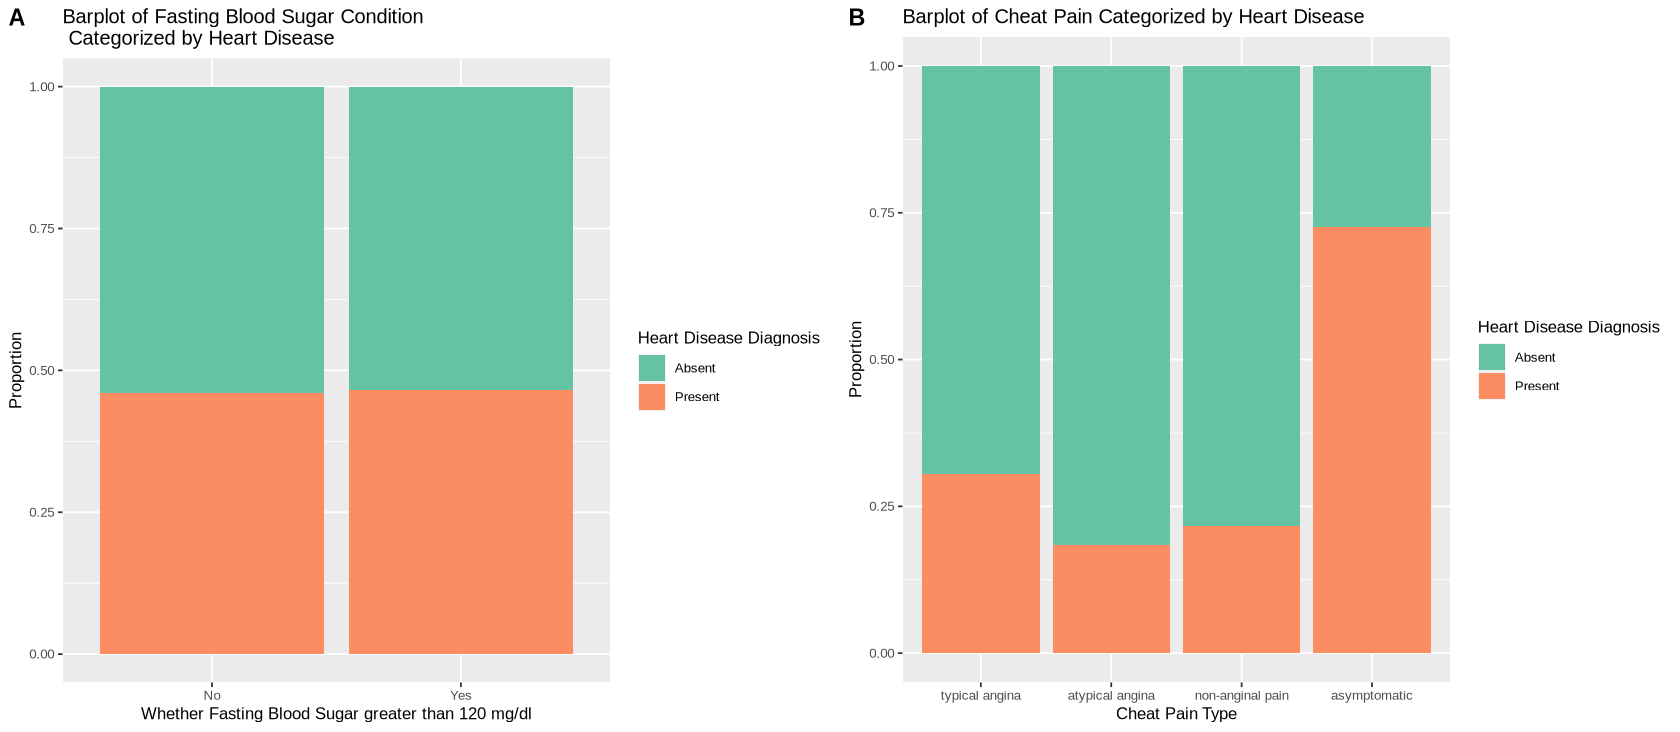

In [43]:
options(repr.plot.width=14, repr.plot.height=6.1)
# plot the barplot for different explanatory variables
cp_plot <- final_data %>%
    ggplot() +
    geom_bar(aes(x = cp, fill = target), position = "fill") +
    labs(title = "Barplot of Cheat Pain Categorized by Heart Disease", 
         x = "Cheat Pain Type", 
         y = "Proportion", 
         fill = "Heart Disease Diagnosis"
        ) + 
    theme(text = element_text(size = 10))+
    scale_fill_brewer(palette = "Set2") +
    scale_x_discrete(labels = c("typical angina", "atypical angina", "non-anginal pain", "asymptomatic")) 

thal_plot <- final_data %>%
    ggplot() +
    geom_bar(aes(x = fbs, fill = target), position = "fill") +
    labs(title = "Barplot of Fasting Blood Sugar Condition \n Categorized by Heart Disease", 
         x = "Whether Fasting Blood Sugar greater than 120 mg/dl", 
         y = "Proportion", 
         fill = "Heart Disease Diagnosis"
        ) + 
    theme(text = element_text(size = 10))+
    scale_fill_brewer(palette = "Set2") +
    scale_x_discrete(labels = c("No", "Yes"))

plot_grid(thal_plot, cp_plot, nrow = 1, labels = "AUTO") 

<font color='grey'>Figure 2. Barplots about Relationship between Categorical Variables and Response Variable </font> 

Plot A in Figure 2 is about the categorical variable "fbs", which is a measure of whether the fasting blood sugar is greater than 120 mg/dl. We can see that the proportion of patients with heart disease in the two categories "Yes" and "No" are very similar (almost the same), which suggests that a patient with heart disease may have either fasting blood sugar greater than 120 mg/dl or not. This indicates that this categorical variable is not helpful in distinguishing whether a patient has heart disease. 

Plot B in Figure 2 is about "Chest Pain Type". We can see that the proportion of patients with heart disease is much higher in the category of "asymptomatic" compared to the others. This shows that if patients show the symptoms of "asymptomatic," they are very likely to have heart disease. Hence, this variable would be useful in predicting whether a patient has heart disease.

For all the other categorical variables ("sex", "restecg", "exang", "slope", "thal"), they all have similar behaviors like Plot B (not shown for conciseness). One of their categories has either a much lower or a higher percentage of patients with heart disease.  This indicates their potential to be significant predictors in later models. 

### 3.2.3 Association between Continuous Explanatory Variable and Response Variable

Here, we investigate the association between "Age," "thalach" and the response variable through boxplots. The reason why we choose "Age" is because, from common sense, it is rational to think that older people are more likely to get heart disease. For "thalach", it measures the maximum heart rate achieved for the patients. Hence, we also feel that a person would have a lower heart rate if they have heart diseases (usually called "Bradycardia"). In this case, it would be interesting to see whether this is the same case from the data. 

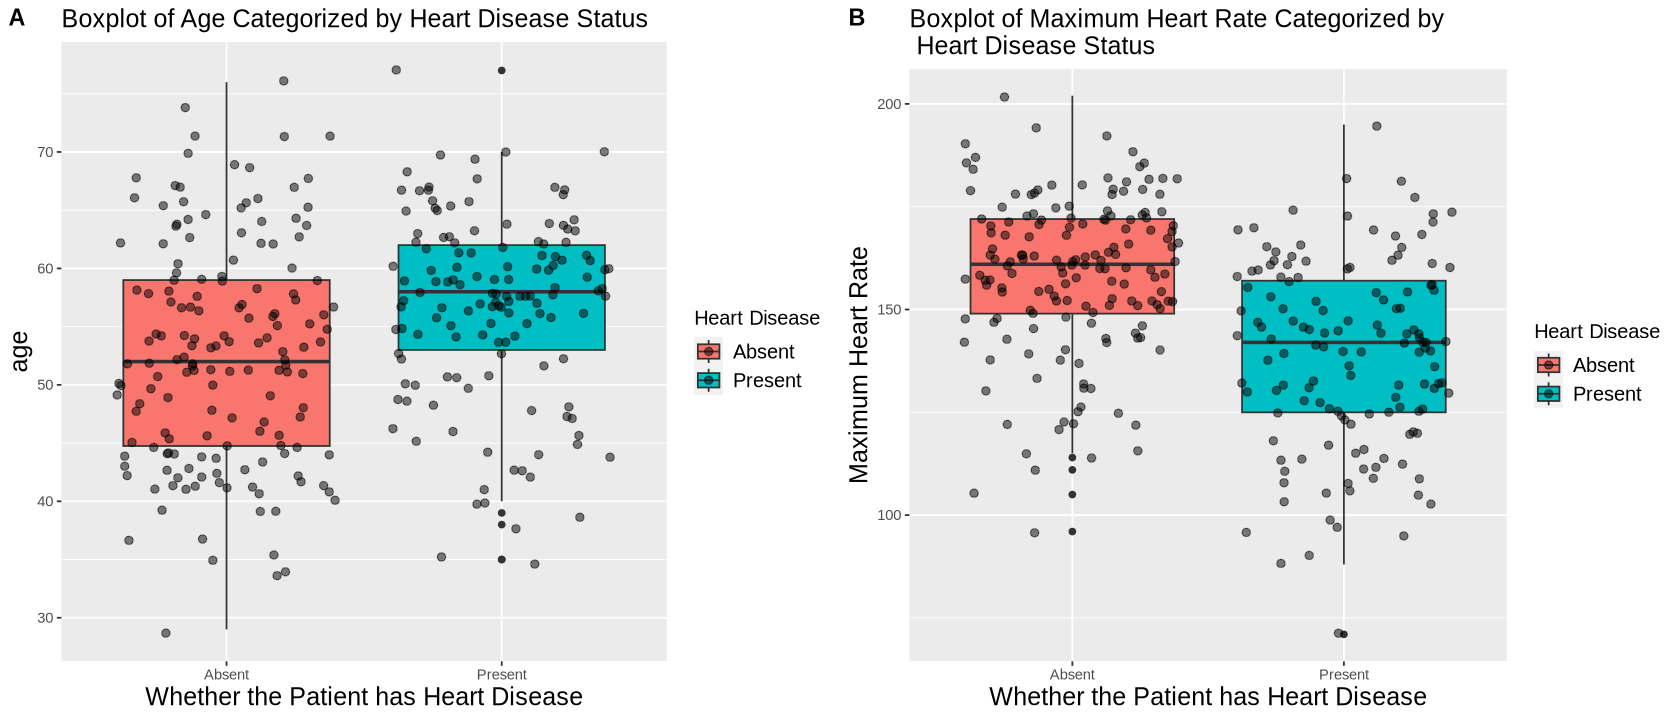

In [44]:
options(repr.plot.width=14, repr.plot.height=6) # set plot window

# plot only age  
boxplot_age <- final_data %>%
    ggplot(aes(x = target, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) + 
    ggtitle("Boxplot of Age Categorized by Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Whether the Patient has Heart Disease") + 
    theme(plot.title = element_text(size= 15), # change the text size
    legend.text = element_text(size= 12),
    legend.title = element_text(size= 12),
    axis.title.x = element_text(size= 15),
    axis.title.y = element_text(size= 15))


# plot only thalach  
boxplot_thalach <- final_data %>%
    ggplot(aes(x = target, y = thalach, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) + 
    ggtitle("Boxplot of Maximum Heart Rate Categorized by \n Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Whether the Patient has Heart Disease") + 
    ylab("Maximum Heart Rate") +
    theme(plot.title = element_text(size= 15), # change the text size
    legend.text = element_text(size= 12),
    legend.title = element_text(size= 12),
    axis.title.x = element_text(size= 15),
    axis.title.y = element_text(size= 15))

plot_grid(boxplot_age, boxplot_thalach, nrow = 1, labels = "AUTO") 

<font color='grey'>Figure 3. Boxplots about Relationship between Continuous Variables and Response Variable </font> 

Plot A in Figure 3 gives insights into the association between "Age" and "Whether Heart Disease is Present". We can see that for patients who have heart disease, 75% of them have ages larger than the median age for patients who do not have heart disease. However, the overlap between the two boxplots is not that small. Thus, this figure indicates that older patients may have a higher chance of having heart disease. But this association would not be very strong.

For Plot B, although there are still overlaps between the two boxes, the overlap is not very big. This suggests that the variable "Maximum Heart Rate" may be a good predictor of whether a patient has heart disease. 


### 3.2.4 Interaction between Age and Categorical Explanatory Variables 

Now, we would like investigate the interaction between age and other categorical explanatory variables. This helps to show whether the association between age and the presence of heart disease is altered by some other categorical variables in the data. In this figure, we considered all categorical explanatory variables except "Resting Electrocardiographic Results" and "Condition of Thalassemia" since both have one category with few observations, making it very hard to tell interaction visually.

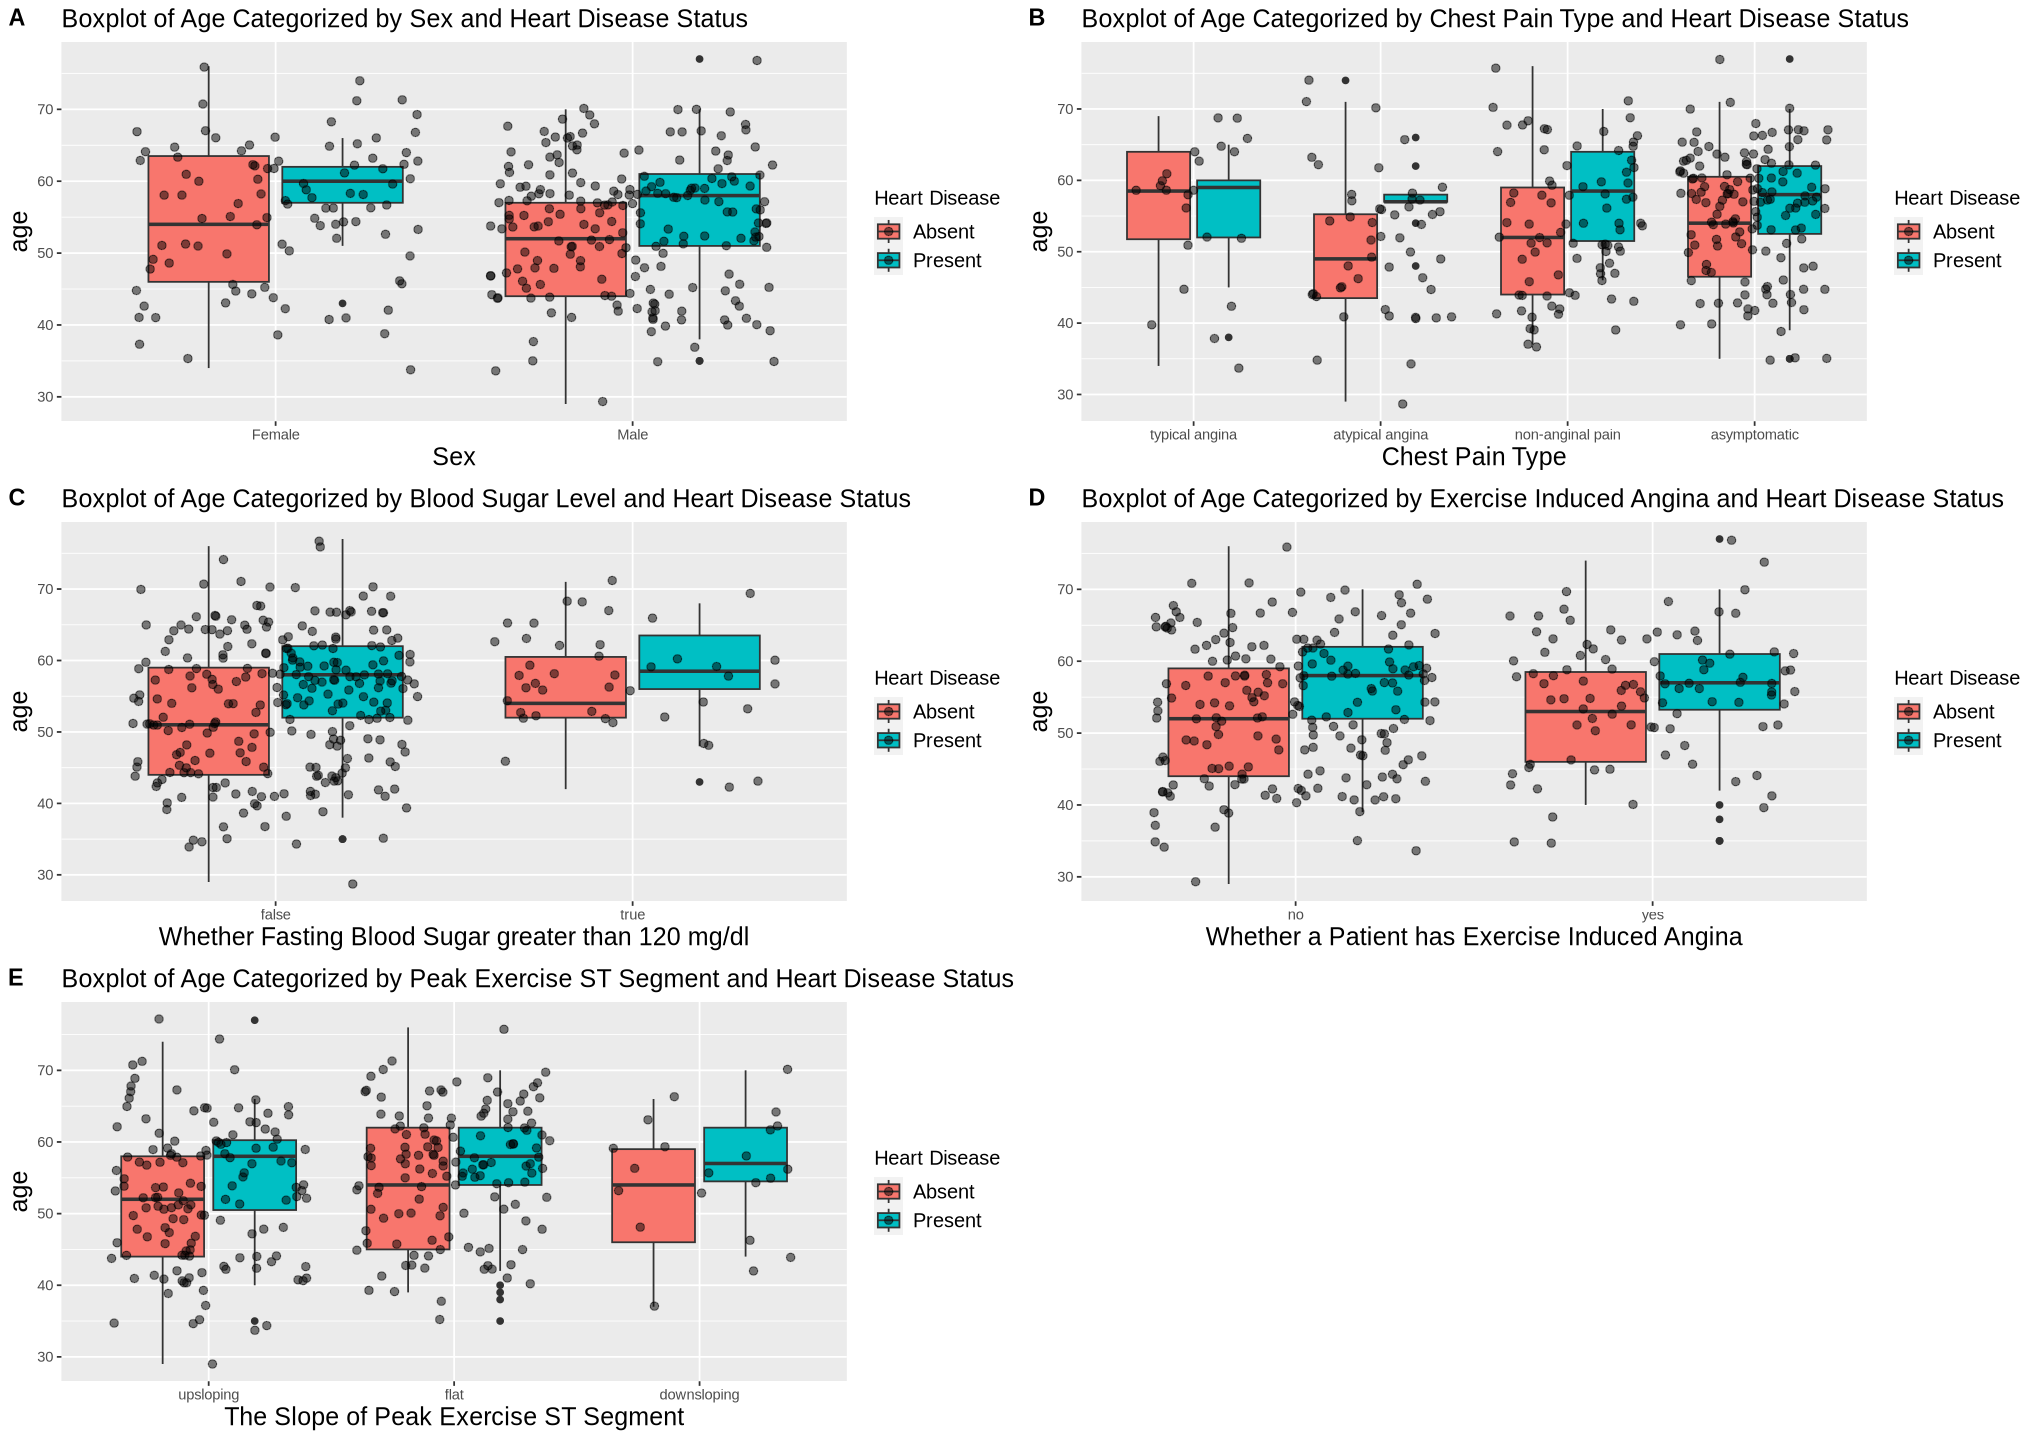

In [45]:
options(repr.plot.width=17, repr.plot.height=12) # set plot window

# plot interaction for age and sex 
box_age_sex <- final_data %>%
    ggplot(aes(x = sex, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) + 
    xlab("Sex") +
    scale_x_discrete(labels = c("Female", "Male")) + 
    ggtitle("Boxplot of Age Categorized by Sex and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    theme(plot.title = element_text(size= 15), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15))

# plot interaction for age and cp 
box_age_cp <- final_data %>%
    ggplot(aes(x = cp, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5)+ 
    scale_x_discrete(labels = c("typical angina", "atypical angina", "non-anginal pain", "asymptomatic")) +    
    ggtitle("Boxplot of Age Categorized by Chest Pain Type and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Chest Pain Type") + 
    theme(plot.title = element_text(size= 15), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15))

# plot interaction for age and fbs 
box_age_fbs <- final_data %>%
    ggplot(aes(x = fbs, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) +
    scale_x_discrete(labels = c("false", "true")) +    
    ggtitle("Boxplot of Age Categorized by Blood Sugar Level and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Whether Fasting Blood Sugar greater than 120 mg/dl") + 
    theme(plot.title = element_text(size= 15), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15))

# plot interaction for age and exang 
box_age_exang <- final_data %>%
    ggplot(aes(x = exang, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) +
    scale_x_discrete(labels = c("no", "yes")) +    
    ggtitle("Boxplot of Age Categorized by Exercise Induced Angina and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Whether a Patient has Exercise Induced Angina") + 
    theme(plot.title = element_text(size= 15), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15)) 

# plot interaction for age and slope 
box_age_slope <- final_data %>%
    ggplot(aes(x = slope, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5)  + 
    scale_x_discrete(labels = c("upsloping", "flat", "downsloping")) +    
    ggtitle("Boxplot of Age Categorized by Peak Exercise ST Segment and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("The Slope of Peak Exercise ST Segment") + 
    theme(plot.title = element_text(size= 15), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15)) 
# plot all the plots together
plot_grid(box_age_sex, box_age_cp, box_age_fbs,box_age_exang, box_age_slope, nrow = 3, labels = "AUTO") 

<font color='grey'>Figure 4. Six Boxplots related to Age, Categorical Explanatory Variables and the Response Variable</font> 

For plot A in Figure 4, it includes the variable "Sex" to investigate the interaction between "Age" and "Sex". We can see that for both males and females, the direction of the potential association between "Age" and "Whether Heart Disease is Present" does not change compared with plot A. It is still the case that patients who have heart disease tend to be older compared with those who do not have heart disease. Therefore, this figure hints that there might not be a clear interaction between "Sex" and "Age".

Similar situations in plot A apply to plots C, D and E. We can see that in plot C, for patients who have either fasting blood sugar greater than 120 mg/dl or smaller than 120 mg/dl, the heart disease tends to appear more frequently on older ones. Also, in plot D, patients who have heart disease tend to be older compared with those who do not have heart disease for either patients with Exercise-Induced Angina or not. Meanwhile, for Plot E, different slopes of the peak exercise ST segment do not change the direction of the potential association between "Age" and "Whether heart disease is present." Hence, all these plots suggest that there might not be an interaction between "Age" and these three categorical explanatory variables, which are "Whether Fasting Blood Suger greater than 120 mg/dl", "Whether a Patient has Exercise Induced Angina," and "Different Slope of Peak Exercise ST Segment".

However, the situation in plot B presents a slightly different picture. We observe that for chest pain types "atypical angina", "non-anginal pain", and "asymptomatic", the association between age and heart disease is still the same as above. However, for chest pain type "typical angina", it seems that more patients without heart disease are older than patients with heart disease. This suggests that there might be a possible interaction between "Age" and "Chest Pain Type." But one thing to note is that there are a small number of observations for chest pain type "typical angina". Hence, this different association might not be real; instead, it might be caused by the limited data size. 

Overall, the six plots here show the potential significance of the variable "Age" in predicting whether a patient has heart disease. Meanwhile, there might be interaction between "Age" and "Chest Pain Type".


## 4 Methods and Implementation
In this section, we mainly perform several model-selection methods and compare the model outputs to get the final prediction model.

### 4.1 Data Preparation (Train/Test)

Since the main purpose of this project is to predict the presence of heart disease in patients, the whole dataset is first splitted into training and testing, with 80% for training and 20% for testing. Then, we use the training data for model fitting and the testing data for model evaluation. This procedure can provide us with an unbiased evaluation of the model's performance since the model has never seen the testing data before predicting.

In [46]:
## First change the response to 0 for absence and 1 for presence

final_data$target <- ifelse(final_data$target == "Absent", 0, 1)

In [47]:
# split the data into training and testing
set.seed(301) # set seed for reproducibility

heart_split <- initial_split(final_data, prop = 0.8, strata = target)
heart_train_raw <- training(heart_split)
heart_test_raw <- testing(heart_split)
head(heart_train_raw)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1 37  1   3  130      250  0   0       187     0     3.5     3     0  3   
2 41  0   2  130      204  0   2       172     0     1.4     1     0  3   
3 56  1   2  120      236  0   0       178     0     0.8     1     0  3   
4 57  0   4  120      354  0   0       163     1     0.6     1     0  3   
5 57  1   4  140      192  0   0       148     0     0.4     2     0  6   
6 52  1   3  172      199  1   0       162     0     0.5     1     0  7   
  target
1 0     
2 0     
3 0     
4 0     
5 0     
6 0

In [48]:
## And use one-hot encoding to get dummy variables for categorical variables

dmy_train <- dummyVars(" ~ .", data = heart_train_raw)
heart_train <- data.frame(predict(dmy_train, newdata = heart_train_raw))

dmy_test <- dummyVars(" ~ .", data = heart_test_raw)
heart_test <- data.frame(predict(dmy_test, newdata = heart_test_raw))
head(heart_train, 3)

age sex.0 sex.1 cp.1 cp.2 cp.3 cp.4 trestbps chol fbs.0 ⋯ exang.1 oldpeak
1 37  0     1     0    0    1    0    130      250  1     ⋯ 0       3.5    
2 41  1     0     0    1    0    0    130      204  1     ⋯ 0       1.4    
3 56  0     1     0    1    0    0    120      236  1     ⋯ 0       0.8    
  slope.1 slope.2 slope.3 ca thal.3 thal.6 thal.7 target
1 0       0       1       0  1      0      0      0     
2 1       0       0       0  1      0      0      0     
3 1       0       0       0  1      0      0      0

### 4.2 Model Implementation 

During the model training process, we would fit several different models to the training data. Then, we would use some model comparision criterias like training AUC and AIC to compare these models. Then, a final model would be selected and used to predict the testing set. In this case, we can see our final model's performance. 

In this study, the response variable is binary: either heart disease is present or not present. Thus, all the models fitted would be logistic regressions. In this case, there are some assumptions for logistic regression we need to check beforehand:

1. Independence: Each observation in the data set must be independent.
   * Usually, it is hard to check whether data is independent when we have limited information about the data collection process. But in this study, the data is about patients' clinical and noninvasive test results. Thus, one patient's result is unlikely to be affected by other patients since these results are directly measured by equipments in the hosptial. Thus, it might be safe to assume that the observations are independent.
   

2. Large sample size
   * Here, our sample size for our final dataset is 297, which is sufficiently large.
   
   
3. Multicollinearity: 
   * It is also important to check whether there is a multicollinearity problem among explanatory variables through VIF. This is because multicollinearity   would make the model become very unstable and have less trustworthy coefficients. We would check this now with the training data.


4. Normality assumption of error term: 
   * The logistic regression model assumes the error term to be Normal. Thus, we would check this assumption via Q-Q plot after we build each model.

**Checking the Multicollinearity**

In this part, we would check whether the explanatory variables have a multicollinearity problem by looking at the VIF. One thing to note is that some categorical variables have a larger degree of freedom. Thus, the GVIF after considering the difference in degree of freedom would be used as the criteria to measure Multicollinearity.

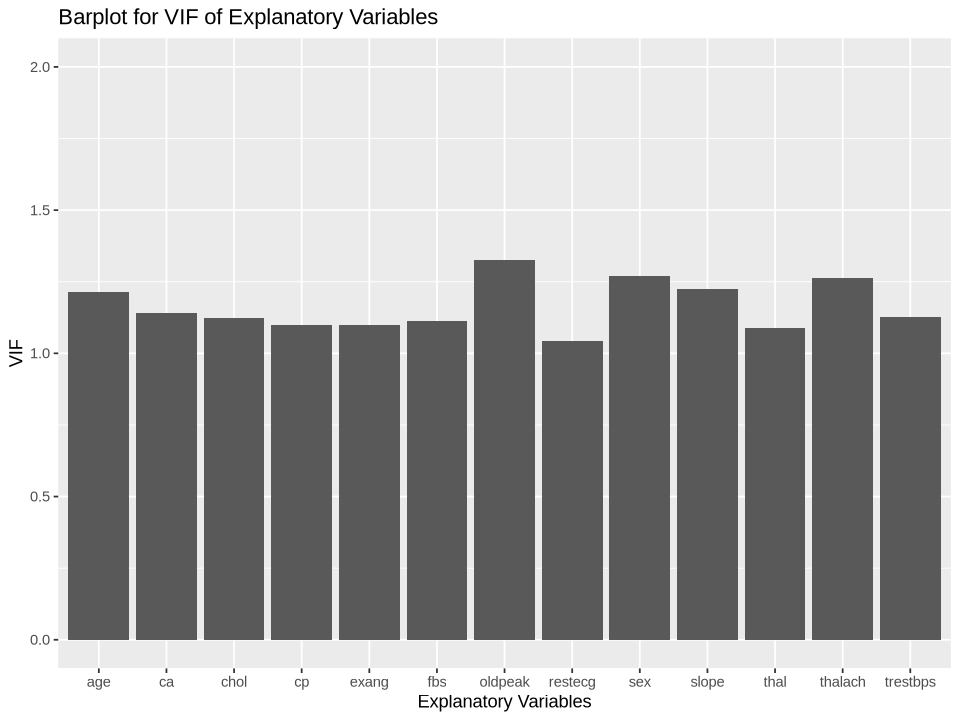

In [49]:
options(repr.plot.width=8, repr.plot.height=6) 
# calculate the VIF
vif_raw <- glm(target ~ ., data = heart_train_raw, family = "binomial")
heart_vif <- data.frame(vif(vif_raw))
heart_vif$variables <- rownames(heart_vif)

# visualize the VIF

ggplot(heart_vif, aes(x = variables, y = GVIF..1..2.Df..)) +
    geom_bar(stat = "identity") +
    xlab("Explanatory Variables") + 
    ylab("VIF") +
    ggtitle("Barplot for VIF of Explanatory Variables")+
    ylim(0,2)

<font color='grey'>Figure 5. Barplot for VIF of Explanatory Variables</font> 

The above figure shows that the VIFs for all the explanatory variables are between 1 and 1.5. Usually, a VIF above five means that we should pay attention to the multicollinearity problem. Thus, since all the VIFs are fairly small, we do not need to worry about the multicollinearity in this study.

### 4.2.1 Logistic Lasso Regression Model

In this subsection, a logistic Lasso Regression would be implemented. The reason for trying logistic regression is that Lasso incorporates a penalty term to regularize coefficients. It keeps only significant explanatory variables in the final model and pushes the coefficient of insignificant variables to 0. Hence, Lasso gives a model that incorporates the most influential explanatory variables and can avoid over-fitting problems. This is good for this project since we want the model to have good prediction accuracy for unseen data.


In [50]:
# perfrom the lasso regression with cross-validation with auc to select parameter
set.seed(32) # for reproducibiliity
lasso_model <- cv.glmnet(x = as.matrix(heart_train[-26]),
            y = factor(heart_train$target), alpha = 1, family = "binomial",type.measure = "auc")

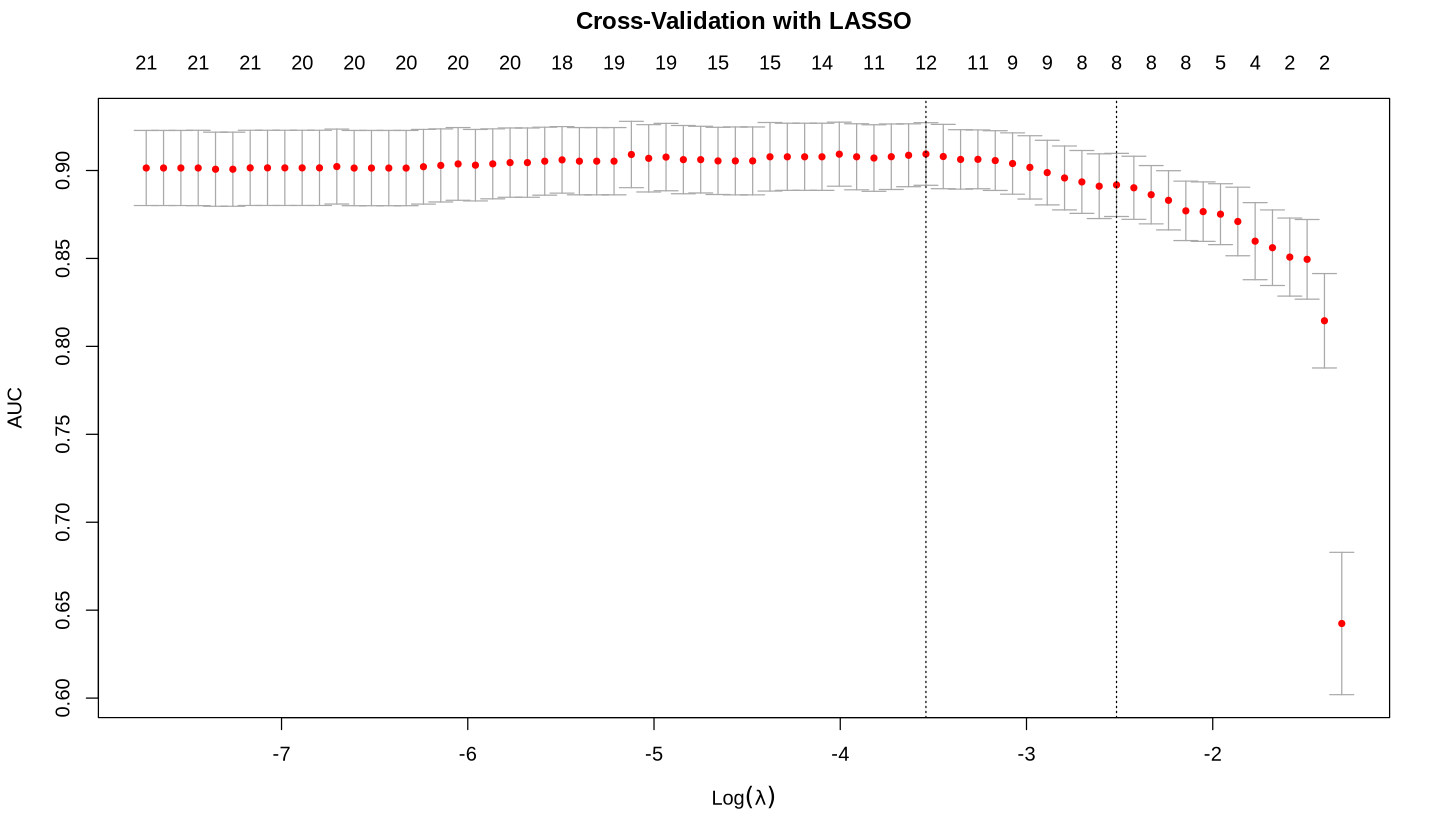

In [51]:
options(repr.plot.width = 12, repr.plot.height = 7)
plot(lasso_model, main = "Cross-Validation with LASSO\n\n")

<font color='grey'>Figure 6. AUC of Lasso Logistic Model with different Lambda</font> 

We can see that the cross-validation with Lasso has higher AUC values for small $\lambda$ and lower AUC values for high  $\lambda$. To proceed, we would select the model with  $\lambda$ that gives the largest AUC value.

In [52]:
# LASSO predictions with lambda.min

lambda_min_LASSO <- lasso_model$lambda.min

min_LASSO <- glmnet(
  x = as.matrix(heart_train[-26]), y = as.matrix(heart_train[26]),
  alpha = 1,
  family = "binomial",
  lambda = lambda_min_LASSO
)

coef(min_LASSO)

26 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) -0.2257306890
age          .           
sex.0       -0.5972180708
sex.1        0.0026228362
cp.1         .           
cp.2         .           
cp.3         .           
cp.4         1.4368682912
trestbps     0.0008739831
chol         .           
fbs.0        .           
fbs.1        .           
restecg.0   -0.0906561033
restecg.1    .           
restecg.2    .           
thalach     -0.0059964333
exang.0     -0.5256180961
exang.1      0.0043229613
oldpeak      0.3485422755
slope.1      .           
slope.2      0.6393030731
slope.3      .           
ca           0.5972271180
thal.3      -0.7301697464
thal.6       .           
thal.7       0.2346236375

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = heart_train$target, predictor = as.vector(heart_pred_prop_lasso))

Data: as.vector(heart_pred_prop_lasso) in 128 controls (heart_train$target 0) < 109 cases (heart_train$target 1).
Area under the curve: 0.9342

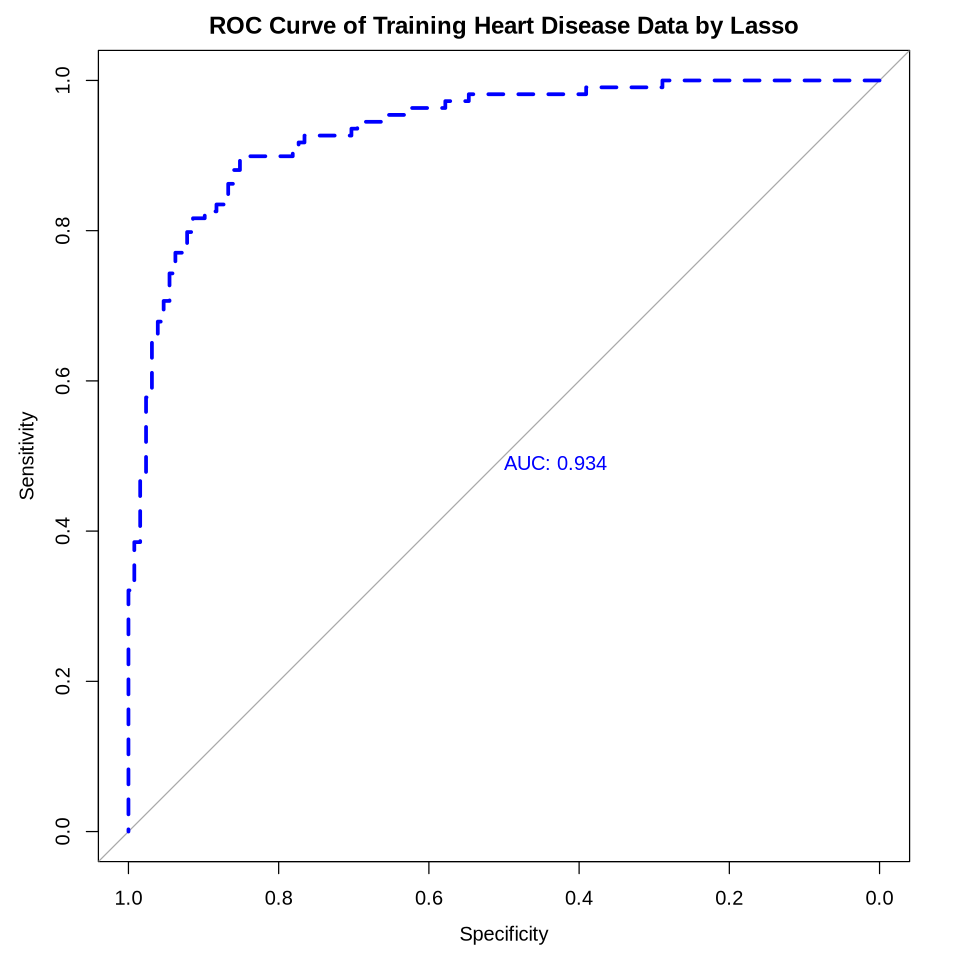

In [53]:
options(repr.plot.width = 8, repr.plot.height = 8) 

# predict the probability 
heart_pred_prop_lasso <- predict(min_LASSO, as.matrix(heart_train[-26]), type = "response")

# create the ROC curve 

ROC_full_log_lasso <- 
    roc(
        response = heart_train$target, 
        predictor = as.vector(heart_pred_prop_lasso))

plot(ROC_full_log_lasso,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curve of Training Heart Disease Data by Lasso", xlim = c(1, 0), asp = NA,
    cex.title=2)
ROC_full_log_lasso

<font color='grey'>Figure 7. ROC Curve of Lasso Model on Training Data</font> 

The ROC curve above shows a training AUC of 0.9342, indicating that the Lasso Logistic model does a fairly good job of classifying the training data. This meets our expectations since the chosen lasso model has the best training AUC.

In [54]:
# manully set up the AIC formula
AICLASSO=function(fit){
  tLL <- -deviance(fit)  
  k <- fit$df
  n <- fit$nobs
  AIC <- -tLL+2*k
  return(AIC)
}

In [55]:
# get the AIC for our model
AIC_Lasso <- AICLASSO(min_LASSO)

# save the auc and AIC to a table
model_output <- data.frame(model = "Lasso", AUC = round(ROC_full_log_lasso$auc, 4), AIC = round(AIC_Lasso, 4))

cat("The AIC for Lasso with optimal choice of lambda is", AIC_Lasso)

model_output

The AIC for Lasso with optimal choice of lambda is 190.0012

model AUC    AIC     
1 Lasso 0.9342 190.0012

**Model Diagnosis**

Now, we would check the assumption of Normality of our Lasso Logistic Regression Model.

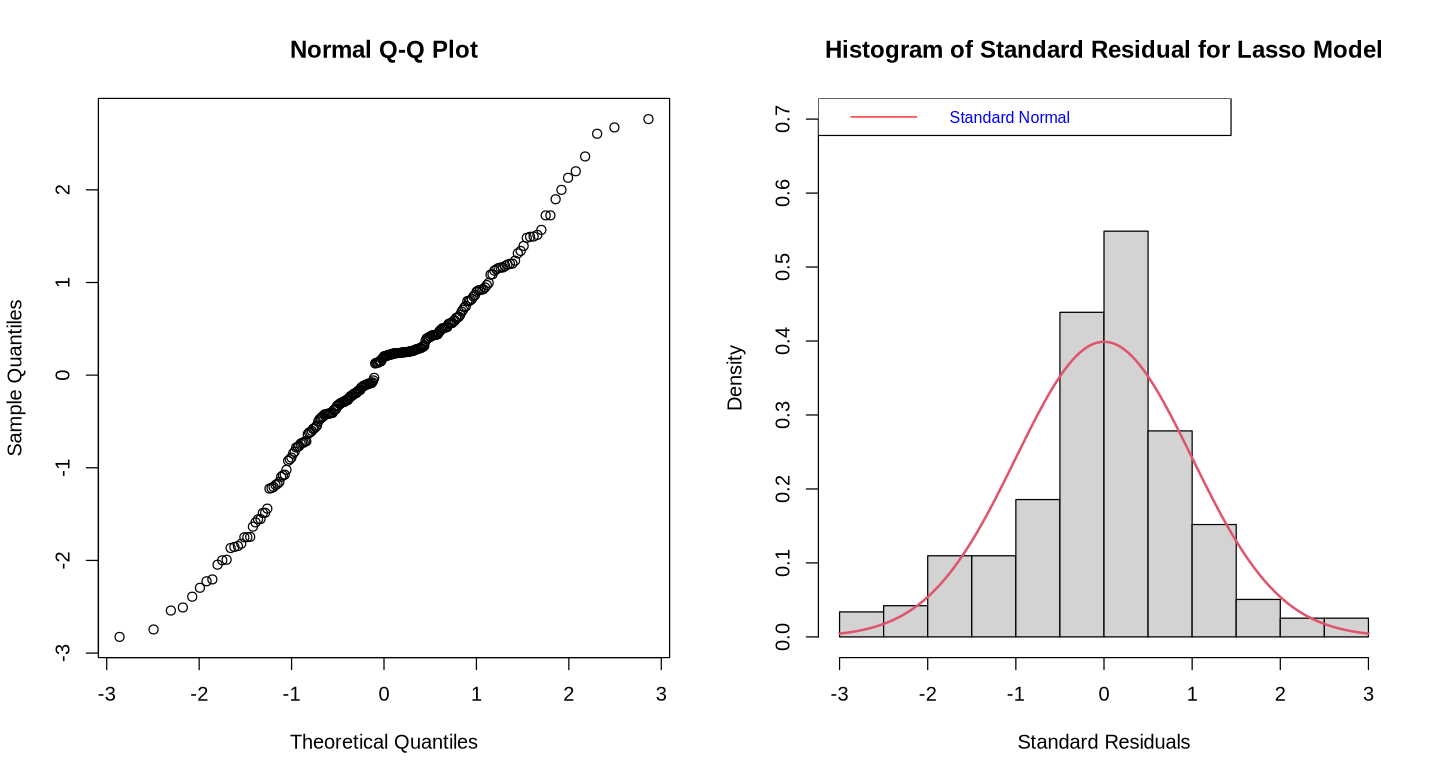

In [56]:
options(repr.plot.width = 12, repr.plot.height = 6.5) # set the window 
residuals <- (heart_pred_prop_lasso - heart_train$target) # create the residuals
standardized_residuals <- residuals / sd(residuals)

par(mfrow= c(1,2))
qqnorm(standardized_residuals)

# create histogram
x2 <- seq(-3, 3, length = 400) # add density of normal 
fun <- dnorm(x2, mean = 0, sd = 1)

hist(standardized_residuals, main = "Histogram of Standard Residual for Lasso Model", 
     prob = TRUE, ylim = c(0, 0.7), xlab = "Standard Residuals")

lines(x2, fun, col = 2, lwd = 2)
legend(x = "topleft", lty = c(1),cex = 0.8,
       col= c("red"),text.col = "blue",  
       legend=c("Standard Normal")) 

<font color='grey'>Figure 8. Model Diagnosis of Lasso Logistic Model</font> 

The Q-Q plot of the standard residuals shows that the data are fairly straight in the middle. However, on the two sides, the data are a little bit curved. From the histogram, it seems that there are a bit more residuals with values close to 0 compared with standard normal density. In this case, we can see that the residuals deviate slightly from a normal distribution.

### 4.2.2 Logistic Regression Model with Forward Selection

In this subsection, we implement forward selection to choose variables for the logistic regression model. We compare models of different sizes and choose the one with the lowest AIC value as the best model.

We choose to try forward selection in this project because it is a very efficient method. It reduces the search space by adding new variables sequentially. Meanwhile, using AIC as the model selection criteria encourages the selection of fewer predictors, which prevents the inclusion of too many variables that could lead to overfitting.

One thing to note is that we utilize `StepAIC` to perform this since `regsubsets` does not allow categorical explanatory variables.



In [57]:
# perfrom the forward selection

# first fit full model
full_model <- glm(target ~. , data = heart_train_raw, family = "binomial")

# implement forward selection
selected_forward_model <- stepAIC(full_model, direction = "forward", trace = FALSE)
selected_forward_model


Call:  glm(formula = target ~ age + sex + cp + trestbps + chol + fbs + 
    restecg + thalach + exang + oldpeak + slope + ca + thal, 
    family = "binomial", data = heart_train_raw)

Coefficients:
(Intercept)          age         sex1          cp2          cp3          cp4  
 -4.8632018   -0.0223091    1.5325701    0.8993568    0.3991161    2.5048427  
   trestbps         chol         fbs1     restecg1     restecg2      thalach  
  0.0219500    0.0008884   -0.6271761    0.5273489    0.5546720   -0.0159835  
     exang1      oldpeak       slope2       slope3           ca        thal6  
  0.8436316    0.5959224    1.1711250   -0.6637811    1.0742286    0.2592064  
      thal7  
  1.1409898  

Degrees of Freedom: 236 Total (i.e. Null);  218 Residual
Null Deviance:	    327 
Residual Deviance: 147.7 	AIC: 185.7

Above is the model output of the best forward selection model based on AIC. We can see that it has 13 explanatory variables. (There are 18 shown above, but some are just different categories of 1 categorical variable) Also, we can see that this model has a AIC value of 185.7.

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = heart_train_raw$target, predictor = as.vector(heart_pred_prop_forward))

Data: as.vector(heart_pred_prop_forward) in 128 controls (heart_train_raw$target 0) < 109 cases (heart_train_raw$target 1).
Area under the curve: 0.9409

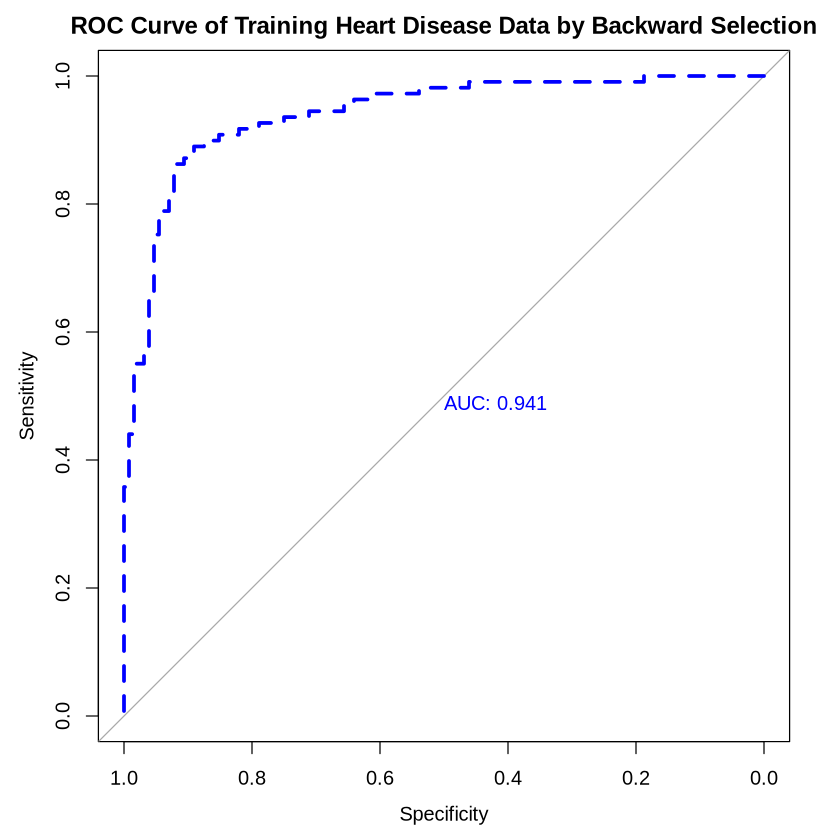

In [58]:
# get the AUC
options(repr.plot.width = 7, repr.plot.height = 7) 

# predict the probability 
heart_pred_prop_forward <- predict(selected_forward_model, heart_train_raw[,-26], type = "response")

# create the ROC curve 

ROC_full_log_forward <- 
    roc(
        response = heart_train_raw$target, 
        predictor = as.vector(heart_pred_prop_forward))
plot(ROC_full_log_forward,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curve of Training Heart Disease Data by Backward Selection", xlim = c(1, 0), asp = NA,
    cex.title=2)
ROC_full_log_forward

<font color='grey'>Figure 9. ROC Curve of Logistic Model with Forward Selection on Training Data</font> 

The ROC curve above shows a training AUC of 0.9409, indicating that the logistic model by forward selection also does a fairly good job of classifying the training data.

In [59]:
# get the AIC for our model
AIC_forward <- AIC(selected_forward_model)

# save the auc and AIC to a table
model_output[2,] <- c("Forward Selection", AUC = round(ROC_full_log_forward$auc, 4), AIC = round(AIC_forward, 4))

cat("The AIC for Forward selection is", AIC_forward)

model_output

The AIC for Forward selection is 185.6798

model             AUC    AIC     
1 Lasso             0.9342 190.0012
2 Forward Selection 0.9409 185.6798

**Model Diagnosis**

Now, we would check the assumption of Normality of our logistic regression model with forward selection.

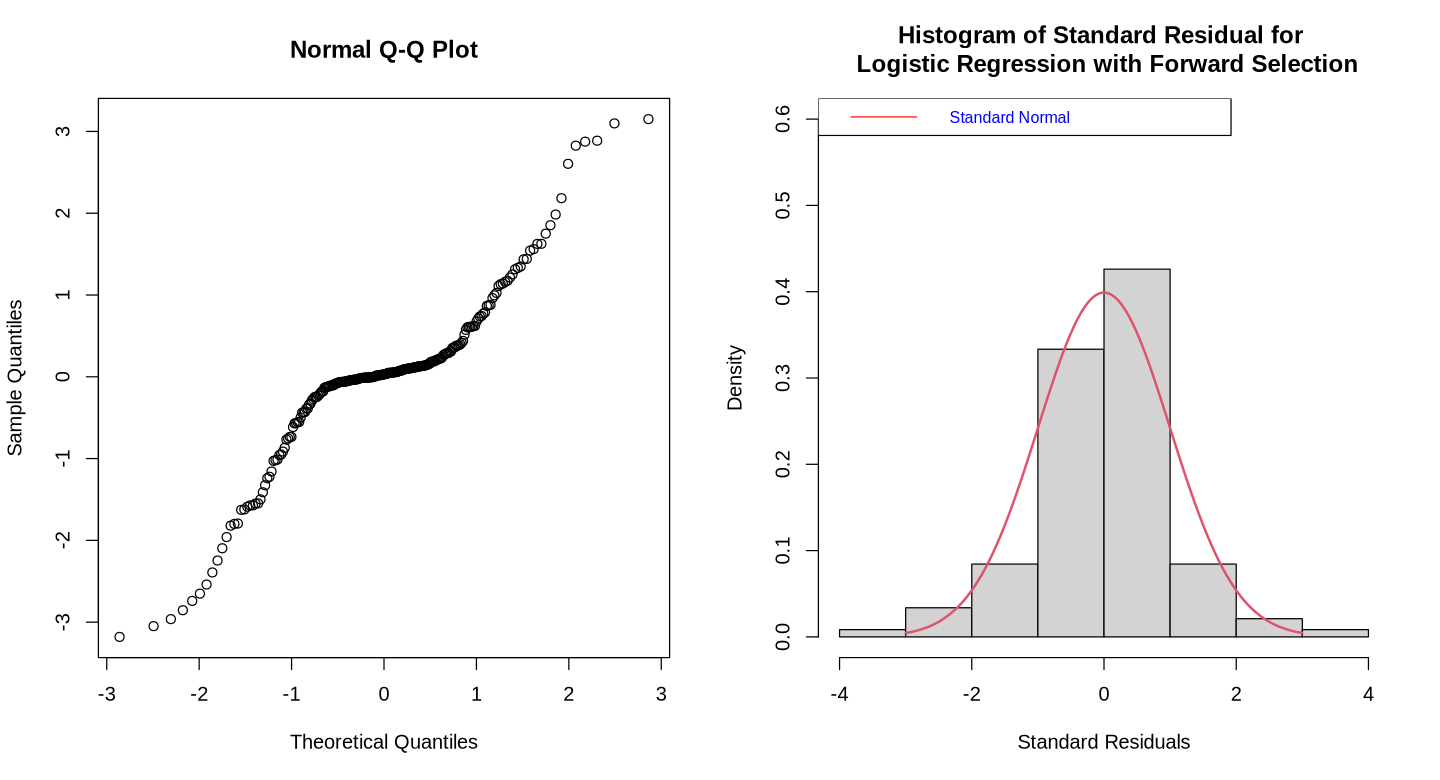

In [60]:
options(repr.plot.width = 12, repr.plot.height = 6.5) # set the window 
residuals <- (heart_pred_prop_forward - heart_train$target) # create the residuals
standardized_residuals <- residuals / sd(residuals)

par(mfrow= c(1,2))
qqnorm(standardized_residuals)

hist(standardized_residuals, main = "Histogram of Standard Residual for \n Logistic Regression with Forward Selection", 
     prob = TRUE, ylim = c(0, 0.6), xlab = "Standard Residuals")

lines(x2, fun, col = 2, lwd = 2)
legend(x = "topleft", lty = c(1),cex = 0.8,
       col= c("red"),text.col = "blue",  
       legend=c("Standard Normal")) 

<font color='grey'>Figure 10. Model Diagnosis of Logistic Regression Model with Forward Selection</font> 

The data on the Q-Q plot above does not look like a straight line. It is pretty curved in both the middle and two-sided. From the Histogram, we can see that, compared with normal distribution, the distribution of the standard residuals has too much data at the two tails. Also, it has too little data at the place that the absolute value of standard residuals is between 1 and 2. In this case, these two plots suggest that the residual of the logistic regression model with forward selection does not seem to follow a normal distribution.

### 4.3 Model Comparison
In this section, we compare the best models by Lasso and Forward Selection. 

In [61]:
# table to compare model
model_output

model             AUC    AIC     
1 Lasso             0.9342 190.0012
2 Forward Selection 0.9409 185.6798

Firstly, the table above shows that the logistic model by forward selection has a smaller AIC but a larger AUC. Hence, it suggests that the logistic regression model by forward selection is slightly better. However, based on the above model diagnosis, it seems that the residuals of the model by forward selection deviate much more from the normality assumption. This suggests that we should not use this model as the final model. Thus, although the train AUC for the Lasso logistic model is slightly lower, we still use this one as the final model.

### 4.4 Prediction
we use the final to predict the testing data set in this section.

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = heart_test$target, predictor = as.vector(heart_pred_prop_lasso_test))

Data: as.vector(heart_pred_prop_lasso_test) in 32 controls (heart_test$target 0) < 28 cases (heart_test$target 1).
Area under the curve: 0.8694

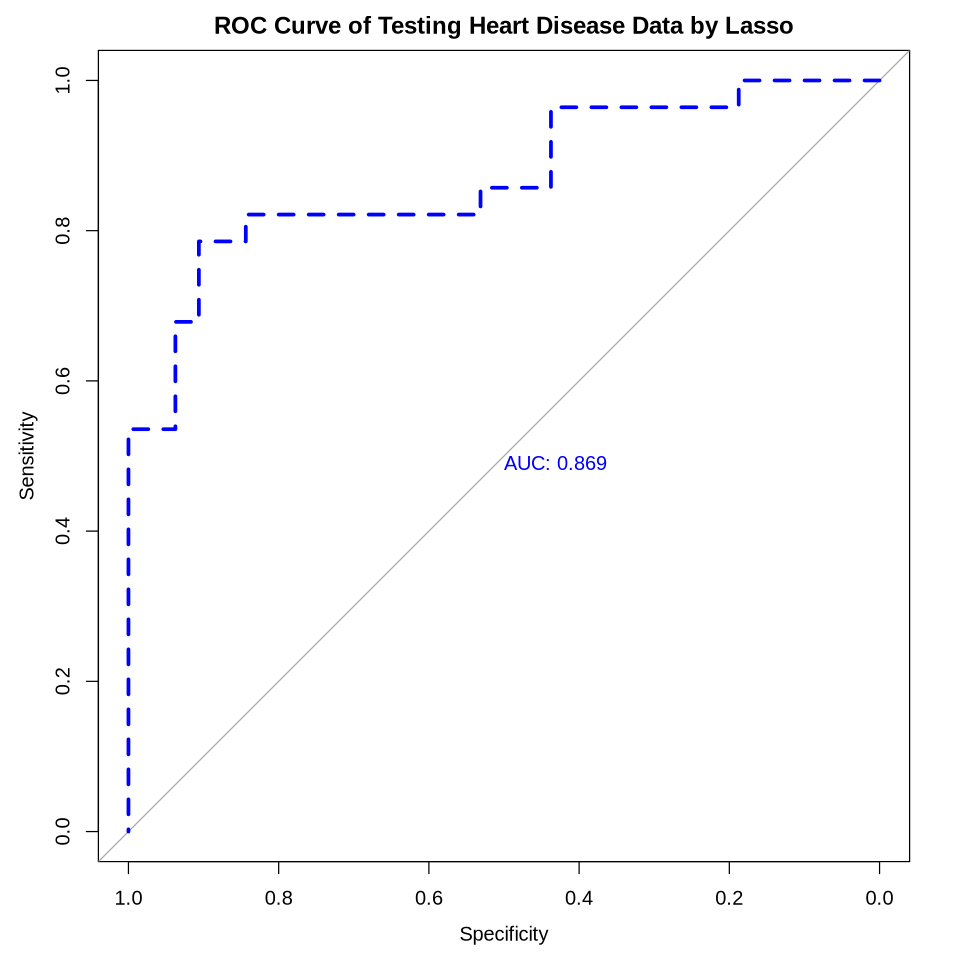

In [62]:
options(repr.plot.width = 8, repr.plot.height = 8) 

# predict the probability 
heart_pred_prop_lasso_test <- predict(min_LASSO, as.matrix(heart_test[-26]), type = "response")

# create the ROC curve 

ROC_full_log_lasso_test <- 
    roc(
        response = heart_test$target, 
        predictor = as.vector(heart_pred_prop_lasso_test))

plot(ROC_full_log_lasso_test,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curve of Testing Heart Disease Data by Lasso", xlim = c(1, 0), asp = NA,
    cex.title=2)
ROC_full_log_lasso_test

<font color='grey'>Figure 11. ROC Curve of Lasso Model on Testing Data</font> 

The ROC curve above has an testing AUC of 0.869, indicating that the Lasso logistic model does a fairly good job of classifying whether a person has heart disease. The result is expected since the explanatory data analysis does indicate some strong associations between some of the categorical explanatory variables and the response variable. 

## 5. Conclusion 

To summarize, the Lasso Logistic Regression Model with $\lambda$ chosen to minimize the AUC in cross-validation reports a test AUC of 0.869. This indicates that this Lasso Logistic Regression Model has a fairly good ability to classify whether a person has heart disease. Hence, we concluded that given the explanatory variables in the dataset, the Lasso Logistic Regression Model can reasonably accurately predict whether the patient has heart disease.


## 6 Discussions

### 6.1 Limitations 
However, there are still some limitations. Firstly, we have removed some missing data in this study. If those values are not missing at random, our model may not be the best one since it is not based on a representative dataset. Also, the final model we choose is the Lasso Logistic Regression Model. For the Normality assumption, the Q-Q plot shows that the residuals still deviate slightly from the normality. Hence, our final model does not satisfy the model assumption perfectly. Lastly, all the observations in the dataset come from Cleveland Clinic in Cleveland, Ohio, US. In this case, the sample may not be representative of a large population (such as the Whole US), which might influence our final model's prediction accuracy if we have new observations from other places.

### 6.2 Recommendations

For the next step, there are also some interesting things that could be looked into. Firstly, as the professor advised, we have only considered additive models for this project. However, if we want to achieve a higher accuracy in practice, some interaction terms could be considered and included in the model. Meanwhile, we have utilized ten explanatory variables in the final model, which is still quite a lot. Efforts could be made in future to find a more parsimony model that includes fewer explanatory variables. Another interesting variable is related to the categorical explanatory variable, "Whether Fasting Blood Sugar is greater than 120 mg/dl." In the exploratory data analysis, we see that this variable is not a really good predictor. However, it might be the case that 120 mg/dl is not a good threshold. For example, people can investigate whether changing the variable to "Whether Fasting Blood Sugar greater than 130 mg/dl (or 110 mg/dl) would make it a better predictor. Lastly, since the Lasso Model does not satisfy the normality assumption perfectly, we could also try some variable transformations.





## 7 References
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J.-J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9 

Hassan, Ch. A., Iqbal, J., Irfan, R., Hussain, S., Algarni, A. D., Bukhari, S. S., Alturki, N., & Ullah, S. S. (2022). Effectively predicting the presence of coronary heart disease using machine learning classifiers. Sensors, 22(19), 7227. https://doi.org/10.3390/s22197227 